# DSCI 303 – Project 03
### Lauren Forti

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Part A: Stock Simulation Function
Create and test a function which simulates daily stock prices.

In [2]:
def simulate_stock(start, rate, vol, days):
    days = np.array([range(1,days+1)])

    # generate daily yields
    daily_yields = np.random.normal(loc = rate/252, scale = vol/(252**0.5), size = days.shape[1])

    # get yields at end of day
    cumulative_yields = np.cumsum(daily_yields)
    
    daily_multipliers = np.exp(cumulative_yields)

    # get daily prices
    daily_prices = np.round(daily_multipliers*start, 2)
    # get array of daily prices
    prices = np.concatenate((np.array([start]), daily_prices))

    return prices

Test the function.

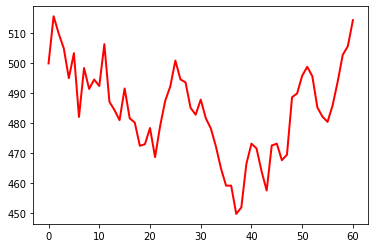

In [3]:
# set a random seed of 1
np.random.seed(1)
# call function with test values
days_60 = simulate_stock(500, .08, .3, 60)

# plot a line chart
plt.plot(days_60, 
         lw = 2,
         color = 'red')
plt.show()

## Part B: Annual Yield Function
Create and test a function which calculates the annual yield for a simulated run.

In [4]:
# get annual yield for stock prices over simulated period
def find_yield(run):
    
    annual_yield = math.log(run[-1]/run[0]) * 252/(run.shape[0] - 1)
    annual_yield = np.round(annual_yield, 4)
    
    return annual_yield

Test function on the previously simulated run of stock prices.

In [5]:
# get yield for previous run
print(find_yield(days_60))

0.1196


Create and plot 25 simulated runs to explore the potential variability.

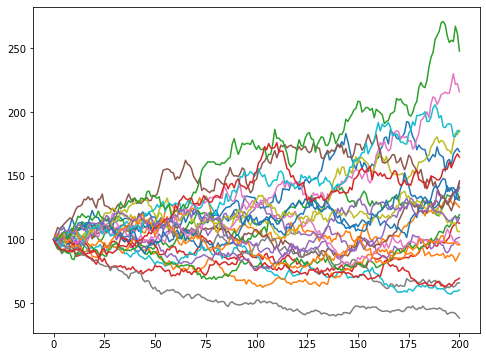

In [6]:
plt.figure(figsize = [8,6])

yields = []

# simulate 25 runs
for i in range(0,25):
    # run simulation
    sim_stocks = simulate_stock(100, .06, .4, 200)
    # add line for current simulation to plot
    plt.plot(sim_stocks)
    
    # calc yield
    sim_yield = find_yield(sim_stocks)
    # add yield to list
    yields.append(sim_yield)

plt.show()

Display the yields for the 25 simulated runs.

In [7]:
print(yields)

[0.6611, 0.2836, 0.3501, 0.1506, 0.0198, 0.3635, 0.9697, -0.5283, 0.7798, -0.6351, 0.4319, -0.1446, 0.2234, -0.4586, 0.4608, 0.4768, -0.0479, -1.2092, 0.0748, 0.7724, 0.3386, -0.0558, 1.1441, 0.6283, 0.1978]


## Part C: Finding Seeds that Generate Specific Outcomes
Find seeds that result in specific stock outcomes.

In the cell below, Stock A has the highest simulated final price.

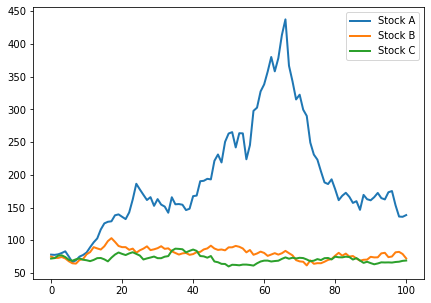

In [8]:
# set random seed where A has highest price
np.random.seed(179)

# list of stock names for labels
stock_names = ['Stock A', 'Stock B', 'Stock C']

# run simulation for 3 stocks
A = simulate_stock(78, .04, 1.2, 100)
B = simulate_stock(75, .08, .8, 100)
C = simulate_stock(72, .16, .6, 100)

# plot line chart of stocks
plt.figure(figsize = [7,5])
plt.plot(A, lw = 2)
plt.plot(B, lw = 2)
plt.plot(C, lw = 2)

# add legend
plt.legend(labels = stock_names)

plt.show()

In the cell below, Stock B has the highest simulated final price.

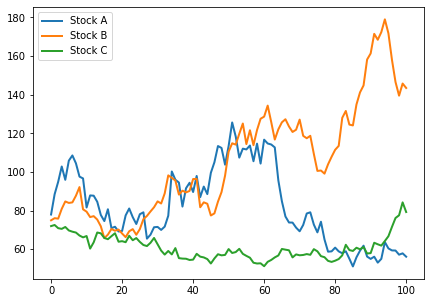

In [9]:
# set random seed where B has highest price
np.random.seed(102)

# list of stock names for labels
stock_names = ['Stock A', 'Stock B', 'Stock C']

# run simulation for 3 stocks
A = simulate_stock(78, .04, 1.2, 100)
B = simulate_stock(75, .08, .8, 100)
C = simulate_stock(72, .16, .6, 100)

# plot line chart of stocks
plt.figure(figsize = [7,5])
plt.plot(A, lw = 2)
plt.plot(B, lw = 2)
plt.plot(C, lw = 2)

# add legend
plt.legend(labels = stock_names)

plt.show()

In the cell below, Stock C has the highest simulated final price.

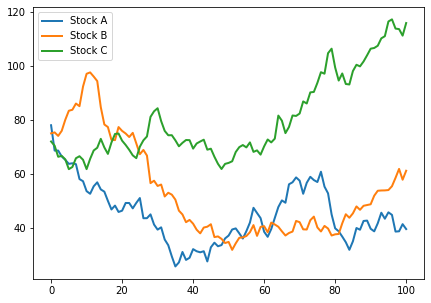

In [10]:
# set random seed where C has highest price
np.random.seed(89)

# list of stock names for labels
stock_names = ['Stock A', 'Stock B', 'Stock C']

# run simulation for 3 stocks
A = simulate_stock(78, .04, 1.2, 100)
B = simulate_stock(75, .08, .8, 100)
C = simulate_stock(72, .16, .6, 100)

# plot line chart of stocks
plt.figure(figsize = [7,5])
plt.plot(A, lw = 2)
plt.plot(B, lw = 2)
plt.plot(C, lw = 2)

# add legend
plt.legend(labels = stock_names)

plt.show()

## Part D: Monte Carlo Simulation
Create a Monte Carlo Simulation.

In [11]:
def monte_carlo(start, rate, vol, days, num_runs):
    
    final_prices = []
    annual_yields = []
    
    i = 0
    while i <= num_runs:
        # simulate a run
        run = simulate_stock(start, rate, vol, days)
        
        # get final price and add to list
        final = run[-1]
        final_prices.append(final)
        
        # get yield and add to list
        an_yield = find_yield(run)
        annual_yields.append(an_yield)
        
        i += 1
    
    final_prices = np.array(final_prices)
    annual_yields = np.array(annual_yields)
    
    return final_prices, annual_yields

Test the Monte Carlo simulation with a seed of 1.

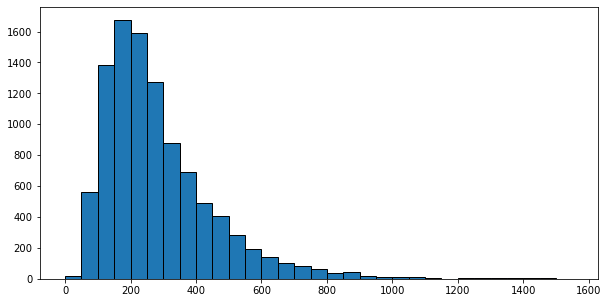

In [12]:
# set seed of 1
np.random.seed(1)

# run simulation
simulation = monte_carlo(200, .1, .4, 500, 10000)
prices = simulation[0]

# plot histogram
plt.figure(figsize = [10,5])
plt.hist(prices,
         edgecolor='k',
         bins=np.arange(0, 1600, 50))
plt.show()

Display the 10th, 25th, 50th, 75th, and 90th percentiles of the
simulated final prices.

In [13]:
percentiles = [10, 25, 50, 75, 90]

# get percentiles and output results
q = 0
for p in percentiles:
    q = np.percentile(prices, p)
    print(f'{p}th percentile: {q:.2f}')

10th percentile: 118.05
25th percentile: 165.57
50th percentile: 242.95
75th percentile: 357.53
90th percentile: 505.91


## Part E: Effects of Volatility
Perform two Monte Carlo simulatins to explore the effect of volatility on simulated stock prices.

In [14]:
# set seed of 1
np.random.seed(1)

# run simulation for stock A
stockA = monte_carlo(100, .12, .3, 150, 10000)
# get yields
stockA_yield = stockA[1]

# run simulation for stock B
stockB = monte_carlo(100, .12, .7, 150, 10000)
# get yields
stockB_yield = stockB[1]

# get average annual yields
stockA_avg = np.average(stockA_yield)
stockB_avg = np.average(stockB_yield)

# output results
print(f'Average Annual Yield for A over 10000 runs: {stockA_avg:.4f}')
print(f'Average Annual Yield for B over 10000 runs: {stockB_avg:.4f}')

Average Annual Yield for A over 10000 runs: 0.1218
Average Annual Yield for B over 10000 runs: 0.1128


Visually inspect the simulation results by plotting histograms of the final prices.

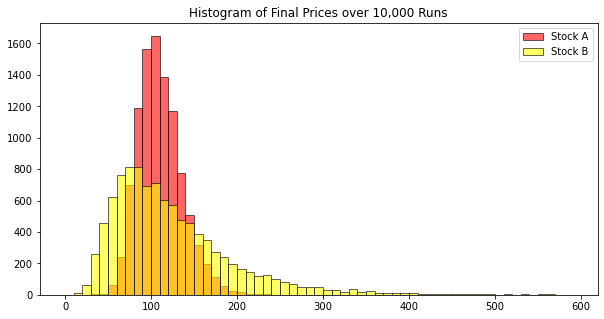

In [15]:
plt.figure(figsize = [10,5])

# plot stock A prices
plt.hist(stockA[0],
         edgecolor='k',
         color='red',
         alpha=.6,
         bins=np.arange(0, 600, 10))

# plot stock B prices
plt.hist(stockB[0],
         edgecolor='k',
         color='yellow',
         alpha=.6,
         bins=np.arange(0, 600, 10))

# plot legend and title
plt.legend(labels=['Stock A', 'Stock B'])
plt.title('Histogram of Final Prices over 10,000 Runs')
plt.show()

## Part F: Comparing Two Stocks

In [16]:
np.random.seed(1)

# run simulation for stock A
stockA = monte_carlo(120, .08, .2, 252, 10000)
# get prices
stockA_price = stockA[0]

# run simulation for stock B
stockB = monte_carlo(120, .05, .5, 252, 10000)
# get prices
stockB_price = stockB[0]

n = len(stockA_price)

# calc proportions
AaboveB = np.round(np.sum(stockA_price > stockB_price)/n, 4)
Aabove150 = np.round(np.sum(stockA_price > 150)/n, 4)
Babove150 = np.round(np.sum(stockB_price > 150)/n, 4)
Abelow100 = np.round(np.sum(stockA_price < 100)/n, 4)
Bbelow100 = np.round(np.sum(stockB_price < 100)/n, 4)

# output results
print(f'Proportions of runs in which...')
print('-'*31)
print(f'A ends above B:   {AaboveB}')
print('')
print(f'A ends above 150: {Aabove150}')
print(f'B ends above 150: {Babove150}')
print('')
print(f'A ends below 100: {Abelow100}')
print(f'B ends below 100: {Bbelow100}')

Proportions of runs in which...
-------------------------------
A ends above B:   0.5235

A ends above 150: 0.2338
B ends above 150: 0.3619

A ends below 100: 0.095
B ends below 100: 0.3195


## Part G: Expected Call Payoff
Estimate the expected payoff of a call on a particular stock.

In [17]:
# set seed of 1
np.random.seed(1)

# get stock prices
stock = monte_carlo(200, .11, .4, 365, 10000)
stock_price = stock[0]

# calc payoff
payoff = stock_price - 225

# find negative prices and set to 0
negative = np.where(payoff < 0)
payoff[negative] = 0

# get avg payoff amount
avg_payoff = np.average(payoff)
# output results
print(f'The average payoff is {avg_payoff}.')

The average payoff is 67.7468183181682.
